# Discussion_10/1 - Polynomial Regression, Regularization

In this discussion, we will be using [the Wine Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/wine). <br >
The data is the results of a chemical analysis of wines grown in the same region in Italy. <br >
There are 13 different measurements taken from 3 types of wines(cultivators/grapevines).

We will use this dataset to build a simple polynomial regression model involving regularization. <br >


### Goals

- Polynomial Regression
- Overfitting and Underfitting
- Regularization (Ridge, Lasso)

Presented by : Bharath Kinnal

## About the Dataset 

Use Pandas to import the data. Once data is imported, address the following issues :

 - Is this attribute numerical, categorical, or binary?
 - How is this attribute distributed? 
 - What are the relationships between the data attributes?
 - Which attribute could be used as the dependent variable? Which could be the independent variables?
 - Are there any outliers in observations?

In [28]:
import pandas as pd
from sklearn.datasets import load_wine

df, _ = load_wine(return_X_y=True, as_frame=True) 

# If you are reading from a local file
# df = pd.read_csv('./wine.csv')

In [27]:
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Polynomial Regression

In this section, we will go through a polynomial regression example to show demonstrate underfitting and overfitting, and how to prevent overfitting with regularization.

Below, we can see that the data does not share a linear relationship.


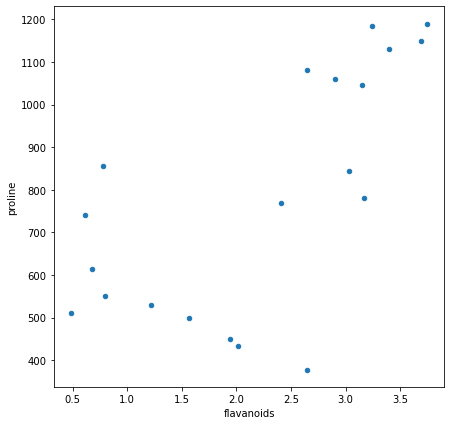

In [4]:
import numpy as np

# You can try different number of data points
df_p = df.sample(20, random_state=21).sort_values(by=['flavanoids'])
X = np.asarray(df_p['flavanoids'])
y = np.asarray(df_p['proline'])

_ = df_p.plot.scatter(x='flavanoids', y='proline', figsize=(7,7), grid=False)

### Underfitting

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data.

It is trivial to see that a **simple linear regression** model would cause the underfitting problem.

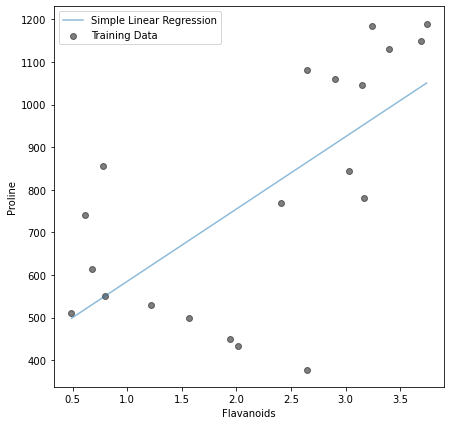

In [13]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mp = LinearRegression(normalize = True)
mp.fit(np.asarray(X).reshape(-1, 1), np.asarray(y).reshape(-1, 1))

plt.figure(figsize=(7,7))
plt.scatter(X, y, color='k', alpha=.5)
plt.plot(np.sort(X), mp.predict(np.asarray(X).reshape(-1,1)), color='tab:blue', alpha=.5)

plt.xlabel("Flavanoids")
plt.ylabel("Proline")
plt.legend(['Simple Linear Regression', 'Training Data'])

plt.show()

### Polynomial Regression

Polynomial Regression considers the relationship between dependent variable $y$ and the $D$th degree polynomial of an independent variable $x$. 

$$y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \cdots + \beta_{D}x^D$$

$$y = \sum_{d=0}^{D} (\beta_{d} x^d)$$

If we want to generate a regression model with 2 inputs ($x_1$ and $x_2$), then the relationship generated will be :

$$y = \sum_{i=0}^{D}\sum_{j=0}^{D} (\beta_{ij} x_1^i x_2^j)$$

One way to implement polynomial regression is to utilize `PolynomialFeatures()` from scikit-learn.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

deg = 5

poly = PolynomialFeatures(degree=deg, include_bias=False)
demo = poly.fit_transform(np.arange(5).reshape(-1, 1))# [0, 1, 2, 3, 4]
pd.DataFrame(demo, columns=[f'x{d+1}' for d in range(deg)])

,x1,x2,x3,x4,x5
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0
2,2.0,4.0,8.0,16.0,32.0
3,3.0,9.0,27.0,81.0,243.0
4,4.0,16.0,64.0,256.0,1024.0


,b0,b1,b2,b3
0,"1,062.0569920940",-889.2348347953,402.8506334537,-41.1058250497


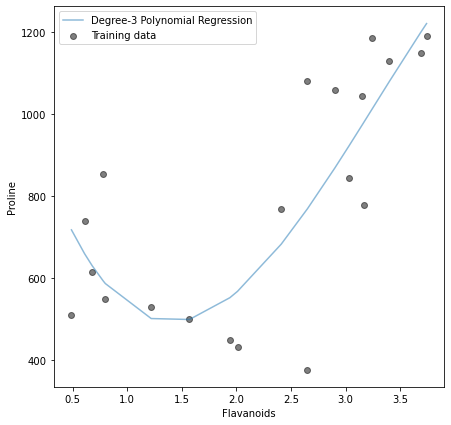

In [35]:
from sklearn.linear_model import LinearRegression
from IPython.display import display

def PolynomialRegression(X, y, deg=2, figsize=7):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # This exactly implements the above formula
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    # Printing Coefficients
    coef = pd.DataFrame(polyReg.coef_, columns=[f'b{i+1}' for i in range(deg)])
    coef.insert(loc=0, column='b0', value=polyReg.intercept_)
    coef = coef.style.format("{:10,.10f}") # Comment this out to not suppressing the scientific notation
    display(coef)
    
    #### Plotting ####
    plt.figure(figsize=(figsize, figsize))
    plt.scatter(X, y, color='k', alpha=.5)
    plt.plot(X, polyReg.predict(X_poly), color='tab:blue', alpha=.5)

    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
PolynomialRegression(X, y, deg=3)

### Overfitting

Overfitting occurs when the model updates the parameters such that it corresponds too closely or exactly to training data. In this case, the performance of the model on the training dataset is significantly better than the performance on the test dataset.

![Fitting](./fitting.png)

A couple of signs that you might have an overfitting problem:
 - The number of parameters in your model is close to the number of your training data points.
 - The testing error suddently increases A LOT when the training error decreases over epochs.
 - The values of parameters become unreasonably large compared to the scale in your data.

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15
0,"-1,418,020.6955855465","13,144,394.2604752891","-51,853,750.2267412022","111,840,491.5501288921","-135,944,605.3706208467","69,432,002.8305195719","52,079,967.0193443820","-132,079,418.2740607113","127,428,075.7588890344","-76,707,441.8810271323","31,567,541.3393419906","-9,067,385.0189153217","1,795,086.9003123313","-234,017.4800942859","18,107.9545674407",-630.5656971470


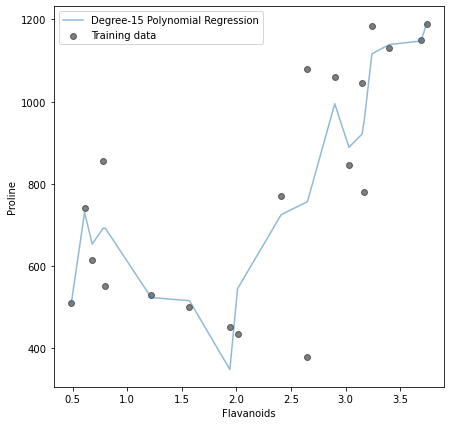

In [21]:
PolynomialRegression(X, y, deg=15)

## Ordinary Least Squares (OLS) method

Given the polynomial regression function of degree $D$ : 
$$
\begin{align*}
\hat{y} &= \beta_{0} + \beta_{1} x + \beta_{2} x^2 + \beta_{3} x^3 + \cdots + \beta_{d} x^D \\
\hat{y} &= \sum_{d=0}^{D} (\beta_{d} x^d)
\end{align*}
$$

The cost function for the model at a data point $i$ would be calculated using the **Ordinary Least Squares (OLS) method**, as follows  :

$$
\begin{align*}
C &= \sum_{i=1}^{M} (y_i - \hat{y_i}) \\
C_i &= \sum_{i=1}^{M} (y_i - \sum_{d=0}^{D} (\beta_{d} x_i^d))
\end{align*}
$$

## Regularization
Regularization is one way to prevent overfitting. <br >
The idea is to penalize the coefficients so that you are discouraged to learn a complex model. <br >
To achieve so, we would add a regularization term to the loss function.

**l1-regularization** and **l2-regularization** are commonly adopted terms in machine learning, with one more hyperparamter $\lambda$, known as 'regularization rate'. (Note that it is called *alpha* in scikit-learn.)

The two types of regression are also known as **Lasso Regression** and **Ridge Regression** respectively.


### L1-regularization
In l1-regularization, the regularization term will be $R_{l1} = \lambda \displaystyle \sum_{d=0}^{D}|\beta_{d}|$. The updated cost function will be :

$$
\begin{align*}
C_{l1} &= C + R_{l1} \\
C_{l1} &= \sum_{i=1}^{M} (y_i - \sum_{d=0}^{D} (\beta_{d} x_i^d)) + \lambda \displaystyle \sum_{d=0}^{D}|\beta_{d}|
\end{align*}
$$


### L2-regularization
In l2-regularization, the regularization term will be $R_{l2} = \lambda \displaystyle \sum_{j=0}^{n}\beta_{j}^2$. The updated cost function will be :


$$
\begin{align*}
C_{l2} &= C + R_{l2} \\
C_{l2} &= \sum_{i=1}^{M} (y_i - \sum_{d=0}^{D} (\beta_{id} x_i^d)) + \lambda \displaystyle \sum_{j=0}^{n}\beta_{j}^2
\end{align*}
$$

Now let's see how regularization can help prevent overfitting in Polynomial Regression.

/home/bharath/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252359.99834817738, tolerance: 152.390455
  model = cd_fast.enet_coordinate_descent(
/home/bharath/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73575e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15
0,"-1,418,020.6955855465","13,144,394.2604752891","-51,853,750.2267412022","111,840,491.5501288921","-135,944,605.3706208467","69,432,002.8305195719","52,079,967.0193443820","-132,079,418.2740607113","127,428,075.7588890344","-76,707,441.8810271323","31,567,541.3393419906","-9,067,385.0189153217","1,795,086.9003123313","-234,017.4800942859","18,107.9545674407",-630.5656971470
1,865.0105524428,-364.4896305467,23.2972245589,31.8252864782,3.9289669960,0.0584564340,-0.1062475124,-0.0353964179,-0.0079490730,-0.0014510839,-0.0002142247,-0.0000204048,0.0000014995,0.0000015893,0.0000006066,0.0000001856
2,604.5551883182,58.1150063913,37.8913540988,-0.1668170705,-28.4835878918,-35.9972445006,-22.7944053882,0.7254638940,16.7177755679,11.5160640158,-6.1249192691,-7.3477415726,5.8611908898,-1.6099781986,0.1928582576,-0.0082001719


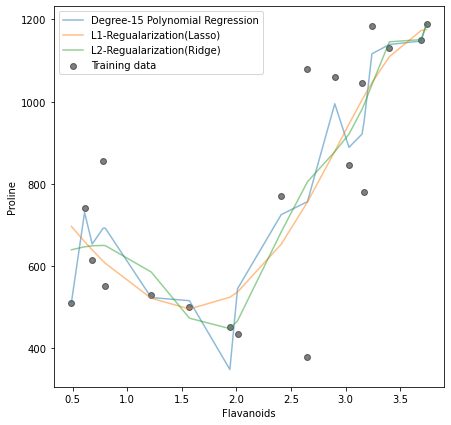

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from IPython.display import display

def RegularizedPolynomialRegression(X, y, deg=2, figsize=7, lamda=0.2):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Polynomial Regression
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    # Polynomial Regression with l1-regularization
    polyRegL1 = Lasso(alpha=lamda).fit(X_poly, y.reshape(-1, 1))
    # Polynomial Regression with l2-regularization
    polyRegL2 = Ridge(alpha=lamda).fit(X_poly, y.reshape(-1, 1))
    
    # Printing Coefficients
    coef = np.concatenate((polyReg.coef_.reshape(1, -1), polyRegL1.coef_.reshape(1, -1), polyRegL2.coef_.reshape(1, -1)), axis=0)
    coef = pd.DataFrame(coef, columns=[f'b{i+1}' for i in range(deg)])
    intercepts = [polyReg.intercept_[0], polyRegL1.intercept_[0], polyRegL2.intercept_[0]]
    coef.insert(loc=0, column='b0', value=intercepts)
    coef = coef.style.format("{:10,.10f}") # Comment this out to not suppressing the scientific notation
    display(coef) 
    
    #### Plotting ####
    plt.figure(figsize=(figsize, figsize))
    plt.scatter(X, y, color='k', alpha=.5)
    
    plt.plot(X, polyReg.predict(X_poly), color='tab:blue', alpha=.5)
    plt.plot(X, polyRegL1.predict(X_poly), color='tab:orange', alpha=.5)
    plt.plot(X, polyRegL2.predict(X_poly), color='tab:green', alpha=.5)

    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'L1-Regualarization(Lasso)', 'L2-Regualarization(Ridge)' ,'Training data'])
    plt.show()

RegularizedPolynomialRegression(X, y, deg=15)